<a href="https://colab.research.google.com/github/Adhi-001/CODSOFT_TASK1/blob/main/Movie_genre_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,classification_report
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string
import nltk

In [8]:
train_data_path="/content/train_data.txt"
train_data = pd.read_csv("/content/train_data.txt", header=None, sep=":::", names=["ID", "Title", "Genres","Description"], engine='python')
train_data.head()

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6311 non-null   int64 
 1   Title        6311 non-null   object
 2   Genres       6311 non-null   object
 3   Description  6311 non-null   object
dtypes: int64(1), object(3)
memory usage: 197.3+ KB


In [10]:
train_data.isnull().sum()

ID             0
Title          0
Genres         0
Description    0
dtype: int64

In [11]:
test_path = "/content/test_data.txt"

test_data = pd.read_csv(test_path, sep=":::", names=["ID", "Title","Description"], engine="python")

test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9822 non-null   int64 
 1   Title        9822 non-null   object
 2   Description  9822 non-null   object
dtypes: int64(1), object(2)
memory usage: 230.3+ KB


In [13]:
test_data.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [14]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
# Function to clean description
def clean_description(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply cleaning function to Description column
train_data['Clean_Description'] = train_data['Description'].apply(clean_description)

<ipython-input-15-e5c69e6448c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)
<ipython-input-15-e5c69e6448c0>:5: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)


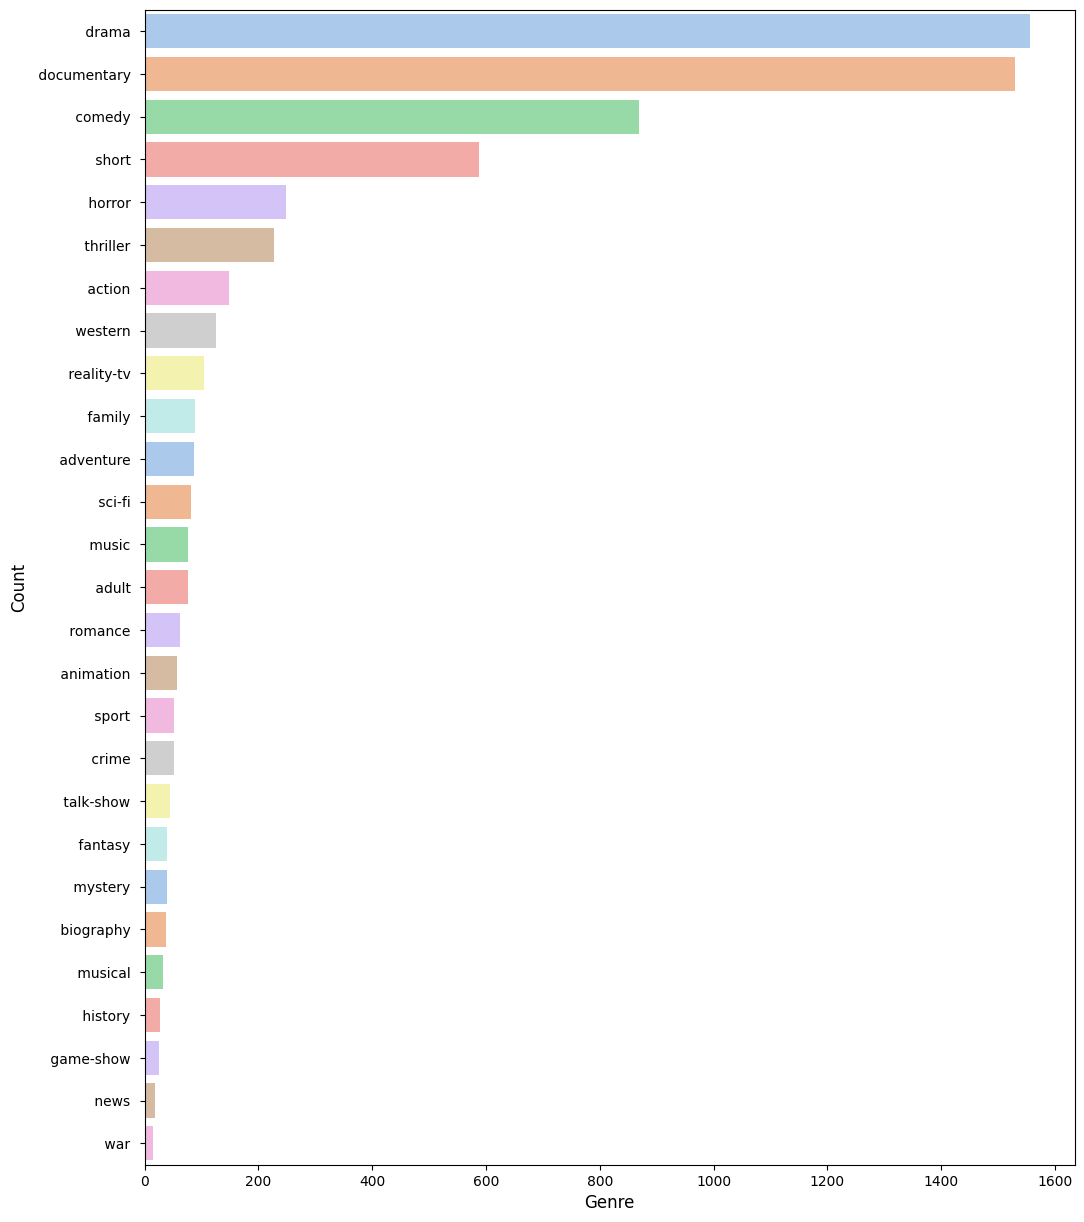

In [15]:
# Plot genre counts
palette = sns.color_palette("pastel")

plt.figure(figsize=(12, 15))
sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

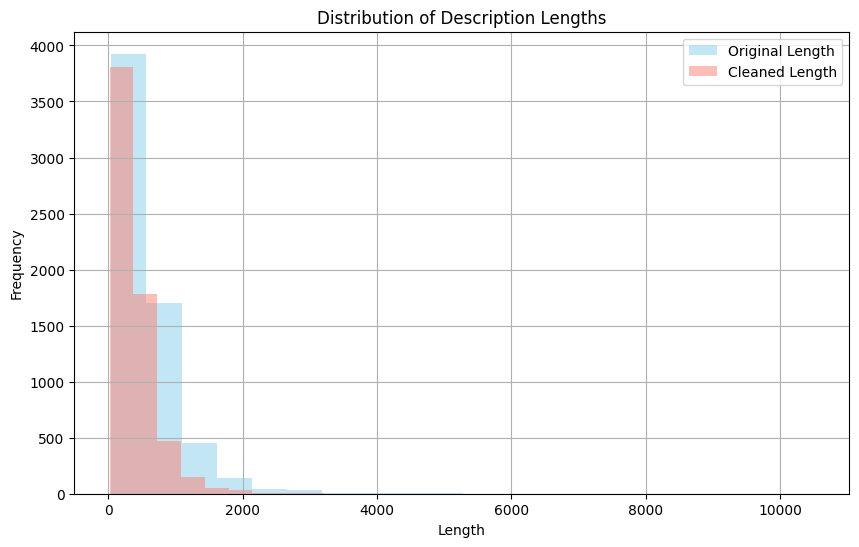

Total characters removed during cleaning: 1236851


In [16]:
# Calculate length of original and cleaned descriptions
train_data['Original_Length'] = train_data['Description'].apply(len)
train_data['Cleaned_Length'] = train_data['Clean_Description'].apply(len)

# Plotting
plt.figure(figsize=(10, 6))

# Plot original lengths
plt.hist(train_data['Original_Length'], bins=20, color='skyblue', alpha=0.5, label='Original Length')

# Plot cleaned lengths
plt.hist(train_data['Cleaned_Length'], bins=20, color='salmon', alpha=0.5, label='Cleaned Length')

plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Calculate count of removed characters
removed_characters = sum(train_data['Original_Length'] - train_data['Cleaned_Length'])
print("Total characters removed during cleaning:", removed_characters)

In [17]:
# Splitting the data into train and validation sets
X = train_data['Clean_Description'].iloc[:20000]
y = train_data['Genres'].iloc[:20000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

In [18]:
# Convert text to numerical features using TF-IDF
vectorize = TfidfVectorizer()
X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf  = vectorize.transform(X_test)

In [19]:
# Training the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [20]:
# Making predictions on the training set
y_pred_val = svm_classifier.predict(X_test_tfidf)
valAccuracy = accuracy_score(y_test, y_pred_val)
print("Validation Accuracy:", valAccuracy)

Validation Accuracy: 0.4600158353127474
